<a href="https://colab.research.google.com/github/RylieWeaver9/Optimization/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent**

### Simple Case: loss function $= ||x-b||_2$

In [ ]:
import numpy as np
import math

# Gradient Descent Implementation in Python for a 2D function

def f(x):
    """ Function to minimize"""
    value = np.sqrt((x[0]-b[0])**2 + (x[1]-b[1])**2)
    return value

def df(x):
    """ Gradient of the function"""
    vector = (x-b)/np.sqrt((x[0]-b[0])**2 + (x[1]-b[1])**2)
    return vector

def gradient_descent(starting_point, threshold):
    """ Function to perform gradient descent with a stopping condition """
    x = np.array(starting_point)
    i = 0

    while True:
        current_value = f(x)
        x_values.append(x)
        y_values.append(current_value)

        if i == 0:
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values
        elif math.log2(i).is_integer(): # Don't flood with prints... iterations scale roughly exponentially to distance
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values

        if current_value < threshold:  # Check if the function value is below the threshold
            break

        grad = df(x)  # Compute the gradient
        learning_rate = 1/(i+1)
        x = x - learning_rate * grad  # Update rule
        i += 1

    return x, i

# Initial parameters
b = [4.5, 6]
x = [0, 0]  # Initial guess
x_values = [] # For plotting
y_values = [] # For plotting
threshold = 0.01  # Stopping condition threshold

# Run gradient descent
minimized_x, iterations = gradient_descent(x, threshold)

# Final result
print(f"\nGradient descent stopped. \n Value of x: {minimized_x} \n f(x): {f(minimized_x)} \n Number of iterations: {iterations}")

x_0: [0 0], f(x)_0: 7.5
x_1: [0.6 0.8], f(x)_1: 6.5
x_2: [0.9 1.2], f(x)_2: 6.0
x_4: [1.25       1.66666667], f(x)_4: 5.416666666666666
x_8: [1.63071429 2.17428571], f(x)_8: 4.7821428571428575
x_16: [2.0284374  2.70458319], f(x)_16: 4.119271006771006
x_32: [2.43509712 3.24679616], f(x)_32: 3.4415048045634813
x_64: [2.84633454 3.79511272], f(x)_64: 2.756109096294233
x_128: [3.25988826 4.34651767], f(x)_128: 2.0668529074108304
x_256: [3.67460698 4.89947597], f(x)_256: 1.3756550371827214
x_512: [4.08990992 5.45321323], f(x)_512: 0.6834834654502797

Gradient descent stopped. 
 Value of x: [4.49427355 5.99236473] 
 f(x): 0.009544084673695252 
 Number of iterations: 1005


# Incorporate matrices and plot: loss function $= ||Ax-b||_2$

Note that the matrix $A=I$ included here repeats the simple case

## Step Size (also called learning rate) = $1$

We don't get convergence here because the step size is too big

### Run GD

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(A, x):
    """ Function to minimize, ||Ax - b||^2 """
    return np.linalg.norm(A @ x - b)

def df(A, x):
    """ Gradient of the function, which is 2A^T(Ax - b) """
    return A.T @ (A @ x - b) / np.linalg.norm(A @ x - b)

def gradient_descent(A, starting_point, threshold):
    """ Gradient descent algorithm to minimize ||Ax - b||^2 """
    x = np.array(starting_point)
    i = 0
    vectors = [] # For plotting
    loss = [] # For plotting

    while i<50000:
        current_value = f(A, x)
        vectors.append(x)
        loss.append(current_value)

        if i == 0:
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values
        elif math.log2(i).is_integer(): # Don't flood with prints... iterations scale roughly exponentially to distance
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values

        if current_value < threshold:  # Stopping condition
            break

        grad = df(A, x)  # Compute the gradient
        learning_rate = 1
        x = x - learning_rate * grad  # Update rule
        i += 1

    return x, vectors, loss, i


# Initialize
A1 = np.array([[1, 0], [0, 1]])  # Example matrices
A2 = np.array([[10, 0], [0, 1]])
A3 = np.array([[15, 8], [6, 5]])
b = np.array([4.5, 6])  # Example vector
x = [0, 0]  # Initial guess for x
threshold = 0.01  # Stopping condition threshold

# List of matrices
matrices = [A1, A2, A3]  # Add more matrices as needed

# Initialize dictionaries to store results
minimized_xs = {}
vectors_dict = {}
loss_dict = {}
iterations_dict = {}

# Run gradient descent for each matrix
for i, A in enumerate(matrices, start=1):
    print(f"\nGradient descent with A: \n {A} \n")
    minimized_x, vectors, loss, iterations = gradient_descent(A, x, threshold)

    # Store the results
    minimized_xs[i] = minimized_x
    vectors_dict[i] = vectors
    loss_dict[i] = loss
    iterations_dict[i] = iterations

    print(f"\nGradient descent stopped. \n Value of x: {minimized_x} \n f(x): {f(A, minimized_x)} \n Number of iterations: {iterations} \n \n")



Gradient descent with A: 
 [[1 0]
 [0 1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [0.6 0.8], f(x)_1: 6.5
x_2: [1.2 1.6], f(x)_2: 5.5
x_4: [2.4 3.2], f(x)_4: 3.5
x_8: [4.8 6.4], f(x)_8: 0.5000000000000001
x_16: [4.8 6.4], f(x)_16: 0.5000000000000001
x_32: [4.8 6.4], f(x)_32: 0.5000000000000001
x_64: [4.8 6.4], f(x)_64: 0.5000000000000001
x_128: [4.8 6.4], f(x)_128: 0.5000000000000001
x_256: [4.8 6.4], f(x)_256: 0.5000000000000001
x_512: [4.8 6.4], f(x)_512: 0.5000000000000001
x_1024: [4.8 6.4], f(x)_1024: 0.5000000000000001
x_2048: [4.8 6.4], f(x)_2048: 0.5000000000000001
x_4096: [4.8 6.4], f(x)_4096: 0.5000000000000001
x_8192: [4.8 6.4], f(x)_8192: 0.5000000000000001
x_16384: [4.8 6.4], f(x)_16384: 0.5000000000000001
x_32768: [4.8 6.4], f(x)_32768: 0.5000000000000001

Gradient descent stopped. 
 Value of x: [4.8 6.4] 
 f(x): 0.5000000000000001 
 Number of iterations: 50000 
 


Gradient descent with A: 
 [[10  0]
 [ 0  1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [6.  0.8], f(x)_1: 55.74307131832619
x_2

### Individual Plots

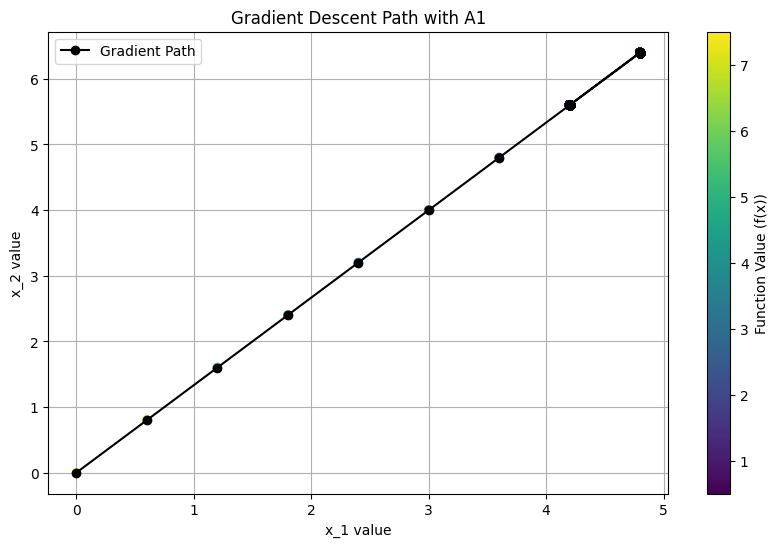

In [14]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[1]]
x2_vals = [x[1] for x in vectors_dict[1]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[1], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A1")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

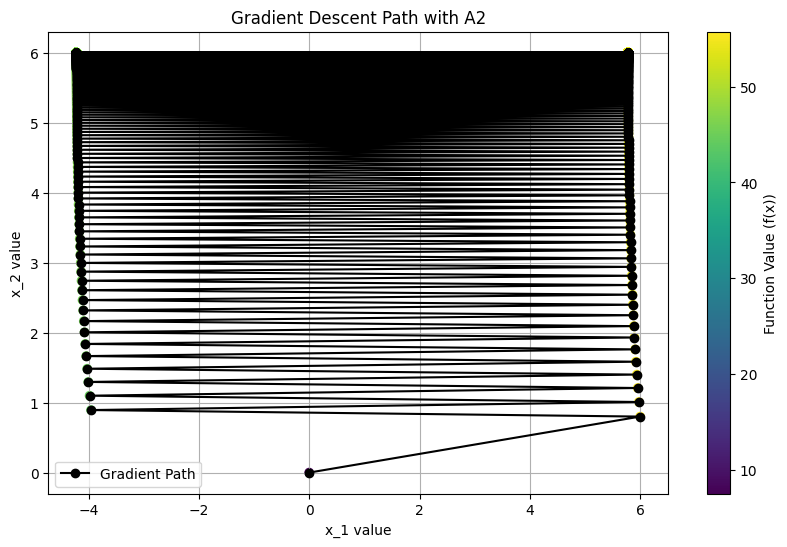

In [15]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[2]]
x2_vals = [x[1] for x in vectors_dict[2]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[2], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A2")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

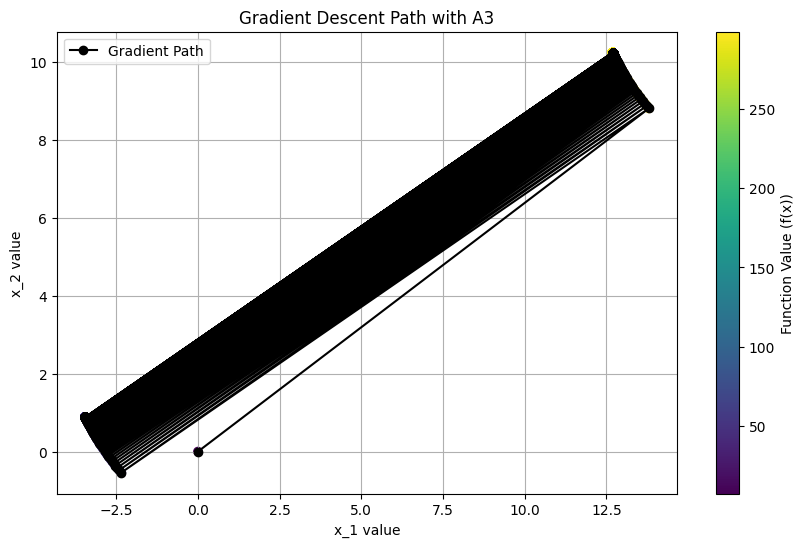

In [16]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[3]]
x2_vals = [x[1] for x in vectors_dict[3]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[3], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A3")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

### Combined Plot

In [17]:
# Initialize dictionaries to store x and y components
x1_vals_dict = {}
x2_vals_dict = {}

# Extract x and y components for each set of vectors
for i in range(1, 4):
    x1_vals_dict[i] = [x[0] for x in vectors_dict[i]]
    x2_vals_dict[i] = [x[1] for x in vectors_dict[i]]

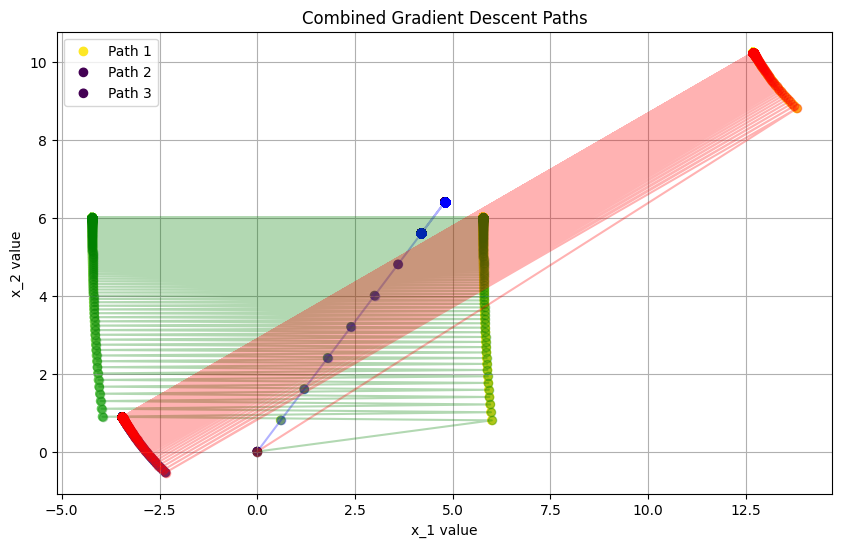

In [18]:
# Define colors for different paths, if needed
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for i in range(1, 4):  # Assuming you have 3 sets of vectors
    x1_vals = x1_vals_dict[i]
    x2_vals = x2_vals_dict[i]
    loss = loss_dict[i]

    # Scatter plot with color-coded points
    sc = plt.scatter(x1_vals, x2_vals, c=loss, cmap='viridis', label=f'Path {i}')

    # Connect the points with lines
    plt.plot(x1_vals, x2_vals, '-o', color=colors[i-1], alpha=0.3)

plt.title("Combined Gradient Descent Paths")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()


## Step Size (also called learning rate) = $(5/6)^i$

We don't get convergence here because the step size is too small

### Run GD

In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(A, x):
    """ Function to minimize, ||Ax - b||^2 """
    return np.linalg.norm(A @ x - b)

def df(A, x):
    """ Gradient of the function, which is 2A^T(Ax - b) """
    return A.T @ (A @ x - b) / np.linalg.norm(A @ x - b)

def gradient_descent(A, starting_point, threshold):
    """ Gradient descent algorithm to minimize ||Ax - b||^2 """
    x = np.array(starting_point)
    i = 0
    vectors = [] # For plotting
    loss = [] # For plotting

    while i<50000:
        current_value = f(A, x)
        vectors.append(x)
        loss.append(current_value)

        if i == 0:
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values
        elif math.log2(i).is_integer(): # Don't flood with prints... iterations scale roughly exponentially to distance
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values

        if current_value < threshold:  # Stopping condition
            break

        grad = df(A, x)  # Compute the gradient
        value = (5/6)**i
        if value == 0: # High i can result in learning_rate == 0 which breaks operations
          break
        learning_rate = value

        x = x - learning_rate * grad  # Update rule
        i += 1

    return x, vectors, loss, i


# Initialize
A1 = np.array([[1, 0], [0, 1]])  # Example matrices
A2 = np.array([[10, 0], [0, 1]])
A3 = np.array([[15, 8], [6, 5]])
b = np.array([4.5, 6])  # Example vector
x = [0, 0]  # Initial guess for x
threshold = 0.01  # Stopping condition threshold

# List of matrices
matrices = [A1, A2, A3]  # Add more matrices as needed

# Initialize dictionaries to store results
minimized_xs = {}
vectors_dict = {}
loss_dict = {}
iterations_dict = {}

# Run gradient descent for each matrix
for i, A in enumerate(matrices, start=1):
    print(f"\nGradient descent with A: \n {A} \n")
    minimized_x, vectors, loss, iterations = gradient_descent(A, x, threshold)

    # Store the results
    minimized_xs[i] = minimized_x
    vectors_dict[i] = vectors
    loss_dict[i] = loss
    iterations_dict[i] = iterations

    print(f"\nGradient descent stopped. \n Value of x: {minimized_x} \n f(x): {f(A, minimized_x)} \n Number of iterations: {iterations} \n \n")



Gradient descent with A: 
 [[1 0]
 [0 1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [0.6 0.8], f(x)_1: 6.5
x_2: [1.1        1.46666667], f(x)_2: 5.666666666666666
x_4: [1.86388889 2.48518519], f(x)_4: 4.393518518518518
x_8: [2.76275506 3.68367341], f(x)_8: 2.8954082361682665
x_16: [3.40528359 4.54037811], f(x)_16: 1.8245273575943717
x_32: [3.5894682 4.7859576], f(x)_32: 1.517553000971196
x_64: [3.59996919 4.79995892], f(x)_64: 1.500051351307178
x_128: [3.6 4.8], f(x)_128: 1.50000000043949
x_256: [3.6 4.8], f(x)_256: 1.499999999999998
x_512: [3.6 4.8], f(x)_512: 1.499999999999998
x_1024: [3.6 4.8], f(x)_1024: 1.499999999999998
x_2048: [3.6 4.8], f(x)_2048: 1.499999999999998

Gradient descent stopped. 
 Value of x: [3.6 4.8] 
 f(x): 1.499999999999998 
 Number of iterations: 4087 
 


Gradient descent with A: 
 [[10  0]
 [ 0  1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [6.  0.8], f(x)_1: 55.74307131832619
x_2: [-2.29699529  0.87773761], f(x)_2: 27.943440778243748
x_4: [-1.21436684  1.07536186], f(x)_4: 17.3

### Individual Plots

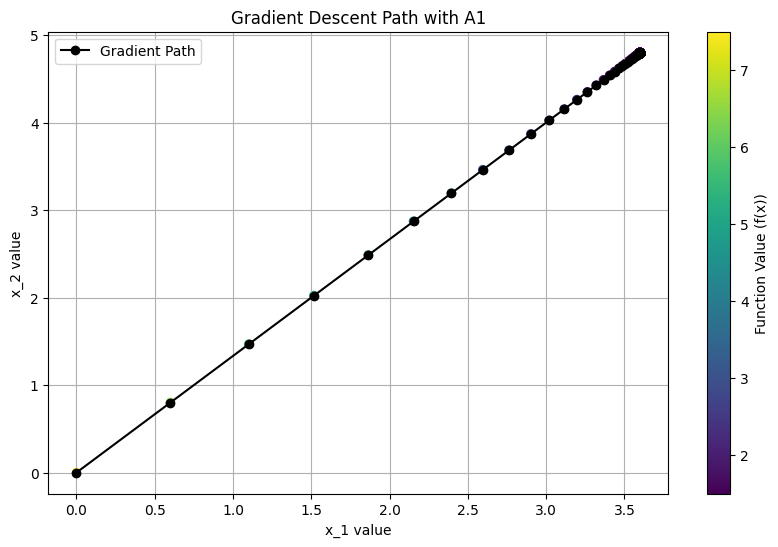

In [44]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[1]]
x2_vals = [x[1] for x in vectors_dict[1]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[1], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A1")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

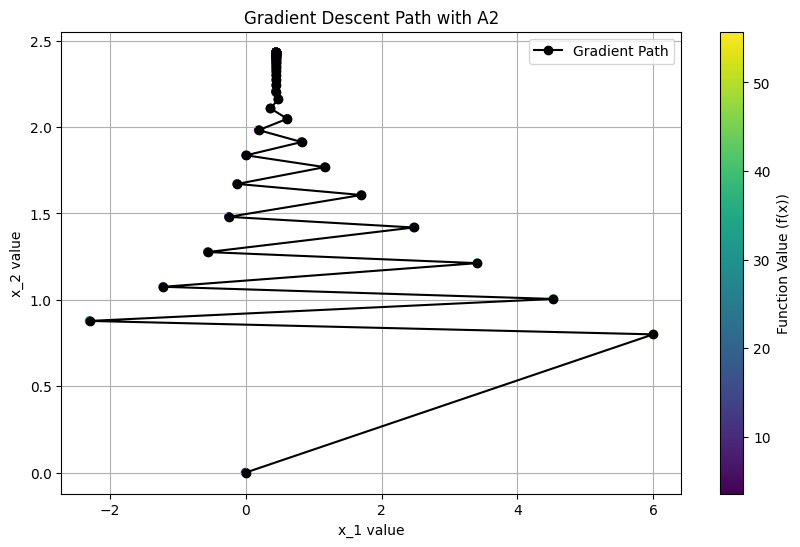

In [45]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[2]]
x2_vals = [x[1] for x in vectors_dict[2]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[2], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A2")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

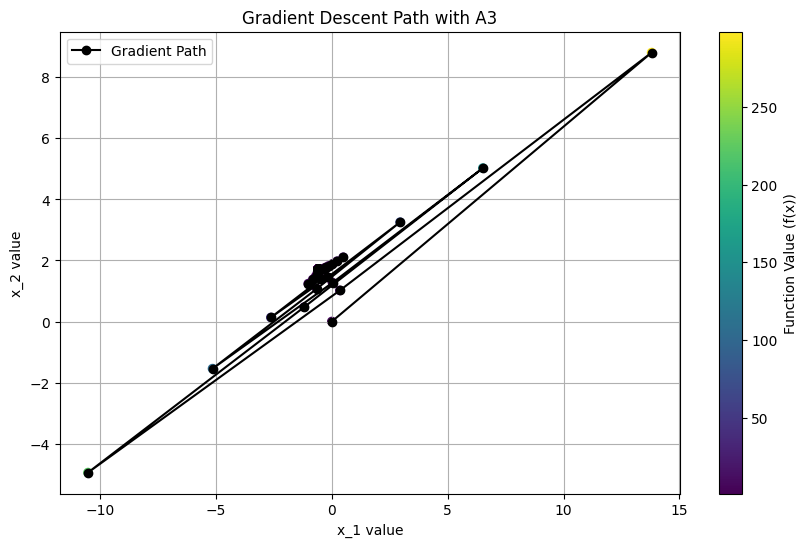

In [46]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[3]]
x2_vals = [x[1] for x in vectors_dict[3]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[3], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A3")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

### Combined Plot

In [47]:
# Initialize dictionaries to store x and y components
x1_vals_dict = {}
x2_vals_dict = {}

# Extract x and y components for each set of vectors
for i in range(1, 4):
    x1_vals_dict[i] = [x[0] for x in vectors_dict[i]]
    x2_vals_dict[i] = [x[1] for x in vectors_dict[i]]

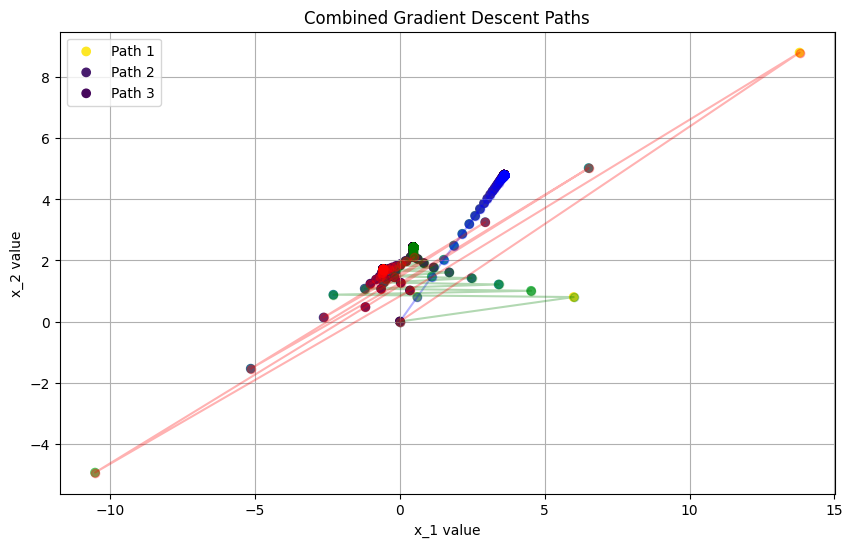

In [48]:
# Define colors for different paths, if needed
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for i in range(1, 4):  # Assuming you have 3 sets of vectors
    x1_vals = x1_vals_dict[i]
    x2_vals = x2_vals_dict[i]
    loss = loss_dict[i]

    # Scatter plot with color-coded points
    sc = plt.scatter(x1_vals, x2_vals, c=loss, cmap='viridis', label=f'Path {i}')

    # Connect the points with lines
    plt.plot(x1_vals, x2_vals, '-o', color=colors[i-1], alpha=0.3)

plt.title("Combined Gradient Descent Paths")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()


## Step Size (also called learning rate) = $1/(i+1)$

We do get convergence here!

### Run GD

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(A, x):
    """ Function to minimize, ||Ax - b||^2 """
    return np.linalg.norm(A @ x - b)

def df(A, x):
    """ Gradient of the function, which is 2A^T(Ax - b) """
    return A.T @ (A @ x - b) / np.linalg.norm(A @ x - b)

def gradient_descent(A, starting_point, threshold):
    """ Gradient descent algorithm to minimize ||Ax - b||^2 """
    x = np.array(starting_point)
    i = 0
    vectors = [] # For plotting
    loss = [] # For plotting

    while True:
        current_value = f(A, x)
        vectors.append(x)
        loss.append(current_value)

        if i == 0:
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values
        elif math.log2(i).is_integer(): # Don't flood with prints... iterations scale roughly exponentially to distance
          print(f"x_{i}: {x}, f(x)_{i}: {current_value}")  # Print the current values

        if current_value < threshold:  # Stopping condition
            break

        grad = df(A, x)  # Compute the gradient
        learning_rate = 1/(i+1)
        x = x - learning_rate * grad  # Update rule
        i += 1

    return x, vectors, loss, i


# Initialize
A1 = np.array([[1, 0], [0, 1]])  # Example matrices
A2 = np.array([[10, 0], [0, 1]])
A3 = np.array([[15, 8], [6, 5]])
b = np.array([4.5, 6])  # Example vector
x = [0, 0]  # Initial guess for x
threshold = 0.01  # Stopping condition threshold

# List of matrices
matrices = [A1, A2, A3]  # Add more matrices as needed

# Initialize dictionaries to store results
minimized_xs = {}
vectors_dict = {}
loss_dict = {}
iterations_dict = {}

# Run gradient descent for each matrix
for i, A in enumerate(matrices, start=1):
    print(f"\nGradient descent with A: \n {A} \n")
    minimized_x, vectors, loss, iterations = gradient_descent(A, x, threshold)

    # Store the results
    minimized_xs[i] = minimized_x
    vectors_dict[i] = vectors
    loss_dict[i] = loss
    iterations_dict[i] = iterations

    print(f"\nGradient descent stopped. \n Value of x: {minimized_x} \n f(x): {f(A, minimized_x)} \n Number of iterations: {iterations} \n \n")



Gradient descent with A: 
 [[1 0]
 [0 1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [0.6 0.8], f(x)_1: 6.5
x_2: [0.9 1.2], f(x)_2: 6.0
x_4: [1.25       1.66666667], f(x)_4: 5.416666666666666
x_8: [1.63071429 2.17428571], f(x)_8: 4.7821428571428575
x_16: [2.0284374  2.70458319], f(x)_16: 4.119271006771006
x_32: [2.43509712 3.24679616], f(x)_32: 3.4415048045634813
x_64: [2.84633454 3.79511272], f(x)_64: 2.756109096294233
x_128: [3.25988826 4.34651767], f(x)_128: 2.0668529074108304
x_256: [3.67460698 4.89947597], f(x)_256: 1.3756550371827214
x_512: [4.08990992 5.45321323], f(x)_512: 0.6834834654502797

Gradient descent stopped. 
 Value of x: [4.49427355 5.99236473] 
 f(x): 0.009544084673695252 
 Number of iterations: 1005 
 


Gradient descent with A: 
 [[10  0]
 [ 0  1]] 

x_0: [0 0], f(x)_0: 7.5
x_1: [6.  0.8], f(x)_1: 55.74307131832619
x_2: [1.02180283 0.84664257], f(x)_2: 7.697593144779091
x_4: [0.96589696 1.1324598 ], f(x)_4: 7.0928072559976
x_8: [0.86465286 1.51767745], f(x)_8: 6.106137472501

### Individual Plots

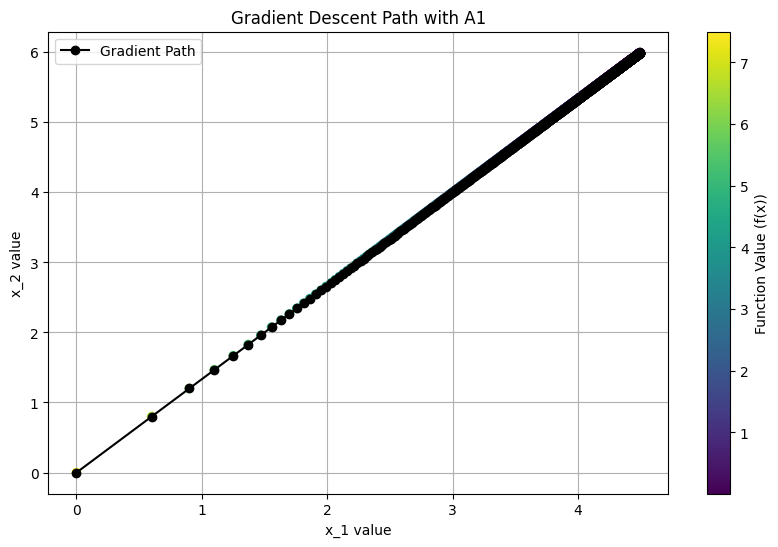

In [7]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[1]]
x2_vals = [x[1] for x in vectors_dict[1]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[1], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A1")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

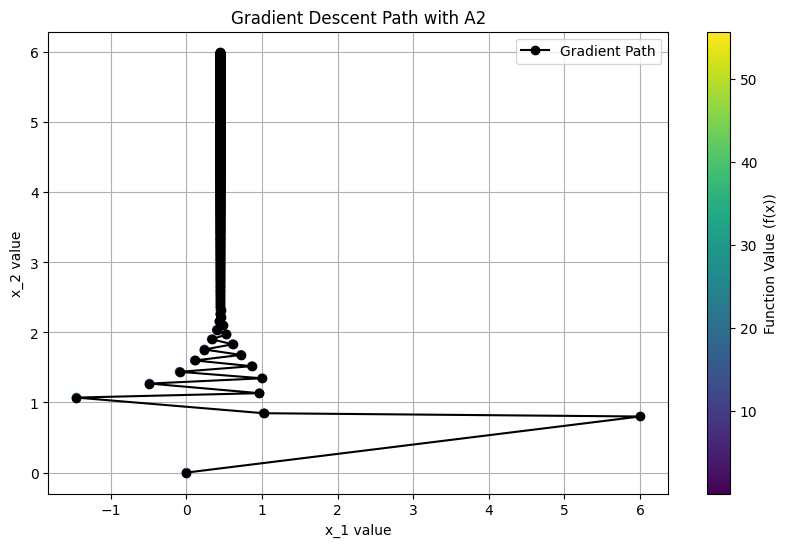

In [8]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[2]]
x2_vals = [x[1] for x in vectors_dict[2]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[2], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A2")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

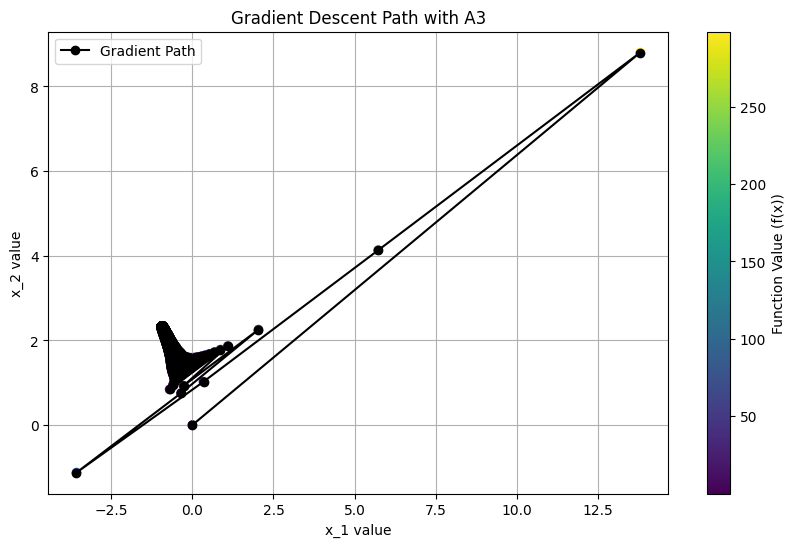

In [9]:
# Extract components for plotting
x1_vals = [x[0] for x in vectors_dict[3]]
x2_vals = [x[1] for x in vectors_dict[3]]

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(x1_vals, x2_vals, c=loss_dict[3], cmap='viridis')
plt.plot(x1_vals, x2_vals, '-o', color='black', label='Gradient Path', alpha=1)  # Semi-transparent lines
plt.colorbar(sc, label='Function Value (f(x))')
plt.title("Gradient Descent Path with A3")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()

### Combined Plot

In [10]:
# Initialize dictionaries to store x and y components
x1_vals_dict = {}
x2_vals_dict = {}

# Extract x and y components for each set of vectors
for i in range(1, 4):
    x1_vals_dict[i] = [x[0] for x in vectors_dict[i]]
    x2_vals_dict[i] = [x[1] for x in vectors_dict[i]]

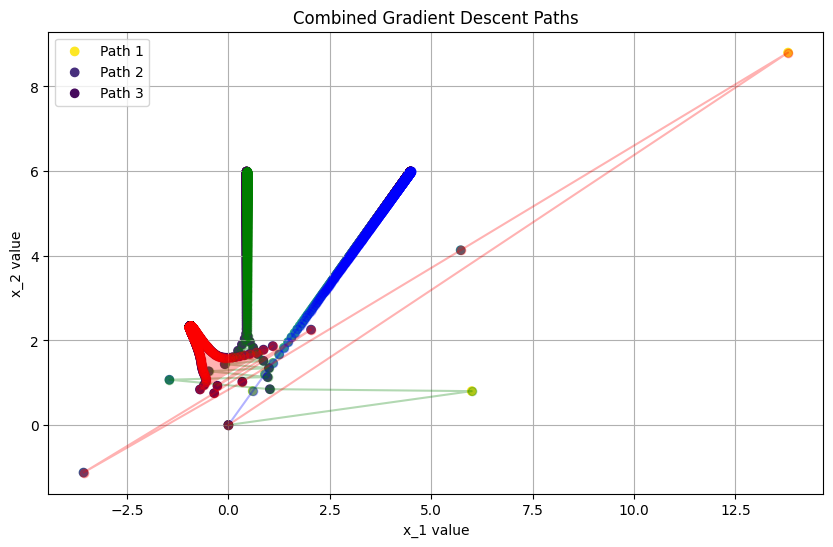

In [11]:
# Define colors for different paths, if needed
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for i in range(1, 4):  # Assuming you have 3 sets of vectors
    x1_vals = x1_vals_dict[i]
    x2_vals = x2_vals_dict[i]
    loss = loss_dict[i]

    # Scatter plot with color-coded points
    sc = plt.scatter(x1_vals, x2_vals, c=loss, cmap='viridis', label=f'Path {i}')

    # Connect the points with lines
    plt.plot(x1_vals, x2_vals, '-o', color=colors[i-1], alpha=0.3)

plt.title("Combined Gradient Descent Paths")
plt.xlabel("x_1 value")
plt.ylabel("x_2 value")
plt.grid(True)
plt.legend()
plt.show()
